Code to generate more images from the original COCO food dataset.  Conditional image to image generation is used with the SD pipeline in this script
Source: huggingface

Issue: returns black image

Trying with saftey checker OFF

In [1]:
import torch
import os
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image
from torchvision import transforms
from PIL import Image

In [5]:
init_image_path =  r".\data\\coco_food\\food_images\\all_food_train2017"
# Define the destination image path outside the loop
dest_image_path_base = r".\data\coco_food\\food_images\\sd_food_train2017"

In [2]:
pipeline = AutoPipelineForImage2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", 
    torch_dtype=torch.float32, 
    variant="fp16",
    safety_checker = None,
    requires_safety_checker= False,
    use_safetensors=True)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
#pipeline.enable_xformers_memory_efficient_attention()

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [3]:
# prepare image and prompt

init_image_path = ".\data\coco_food\\food_images\\all_food_train2017\\000000001059.jpg"
#relative_path = os.path.join('data', 'coco_food', 'food_images', 'all_food_train2017', '000000000092.png')
init_image = Image.open(init_image_path)

# Define the destination image path outside the loop
dest_image_path_base = ".\data\coco_food\\food_images\\sd_food_train2017\\000000001059_"

prompt = "A cheesy pepperoni pizza sitting on top of a pan"
negative_prompt = "dull colors, low contrast, disfigured, poor details"

c:\Users\maria\anaconda3\envs\cv3dr\lib\site-packages\diffusers\models\attention_processor.py:1279: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  hidden_states = F.scaled_dot_product_attention(


  0%|          | 0/40 [00:00<?, ?it/s]

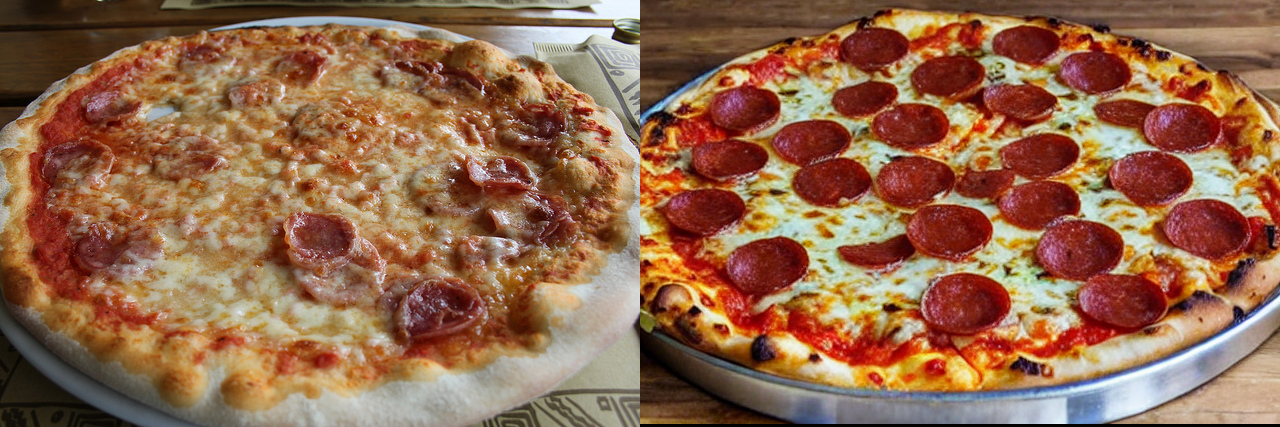

In [4]:
#Original version from huggingface
# pass prompt and image to pipeline
image = pipeline(prompt, negative_prompt=negative_prompt, strength=0.8, guidance_scale=8.0, image=pil_image).images[0]
make_image_grid([init_image, image], rows=1, cols=2)